In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [7]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 5.0 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 4.2 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.6 MB 5.8 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   --------------------------

In [3]:
df=pd.read_csv("C:/Users/Admin/OneDrive/Documents/TopMentor/50_Startups.csv")

In [4]:
# Step 3: Initial EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

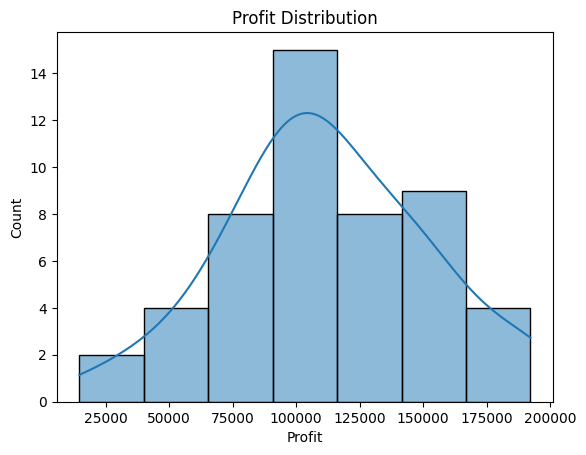

In [10]:
# Distribution of Profit
sns.histplot(df['Profit'], kde=True)
plt.title("Profit Distribution")
plt.show()


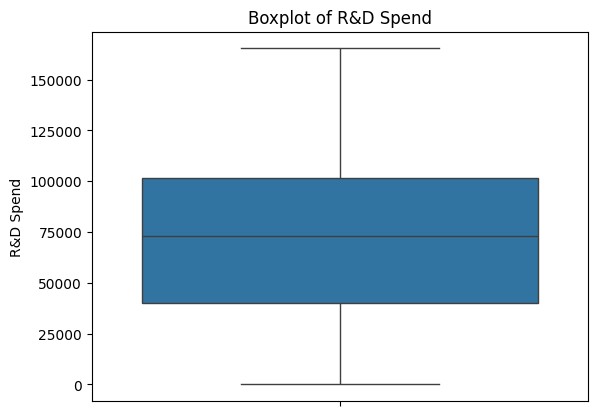

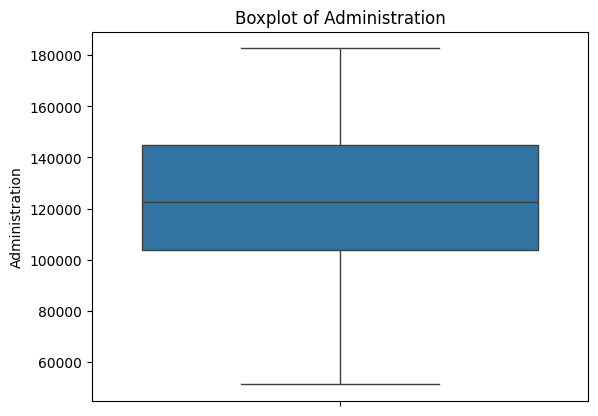

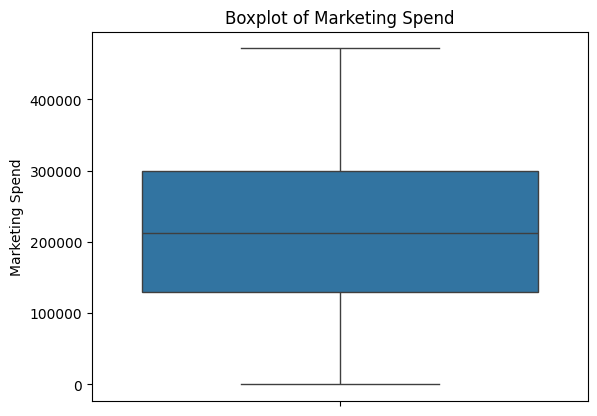

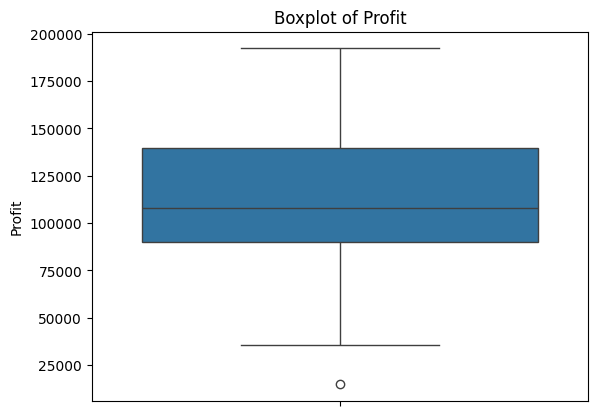

In [11]:
# Boxplots for Outliers
for col in ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# Step 5: Encode Categorical Column
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Step 6: Split Data
X = df.drop("Profit", axis=1)
y = df["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [15]:
# Step 7: Model Building and Transformation Comparisons
results = []

In [16]:
# Model 1: Raw Data
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)
pred_raw = model_raw.predict(X_test)
r2_raw = r2_score(y_test, pred_raw)
results.append(["Raw", r2_raw])

In [17]:
# Model 2: Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, pred_scaled)
results.append(["Standard Scaled", r2_scaled])

In [18]:
# Model 3: Power Transformer
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train + 1e-5)
X_test_pt = pt.transform(X_test + 1e-5)

model_pt = LinearRegression()
model_pt.fit(X_train_pt, y_train)
pred_pt = model_pt.predict(X_test_pt)
r2_pt = r2_score(y_test, pred_pt)
results.append(["Power Transformed", r2_pt])

In [22]:
# Step 8: OLS Summary (FIXED)
X_numeric = X.select_dtypes(include=[float, int])
X_const = sm.add_constant(X_numeric)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           4.53e-30
Time:                        20:44:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

In [20]:
# Step 9: R² Comparison Table
r2_table = pd.DataFrame(results, columns=["Model", "R² Score"])
print("\nR² Score Comparison Table:")
print(r2_table)


R² Score Comparison Table:
               Model  R² Score
0                Raw  0.956036
1    Standard Scaled  0.956036
2  Power Transformed  0.961070


In [21]:
# Step 10: Insights
for name, score in results:
    print(f"Model: {name} → R² Score = {score:.4f}")

Model: Raw → R² Score = 0.9560
Model: Standard Scaled → R² Score = 0.9560
Model: Power Transformed → R² Score = 0.9611
